# Rain Water Harvesting Simulation

## Rainfall

### Dataset
Hourly precipitation data  was received from the National Oceanic and Atmospheric Administration
 (NOAA):

https://www.ncdc.noaa.gov/cdo-web/search

and saved in [2228731.csv](./2228731.csv).

|Field|Data|
|-----|----|
|Locations|CITY:US290021|
|Begin Date|2010-01-01 00:00|
|End Date|2013-12-23 23:59|
|Data Types|HPCP|
|Units|Metric|
|Custom Flag(s)|Station NameGeographic LocationInclude Data Flags|

The same data in **Standard** (instead of *Metric*) was saved in [2228739.csv](./2228739.csv) for convenience.

> **HPCP**: The amount of precipitation recorded at the station for the hour ending at the
time specified for **DATE** above given in hundredths of inches or tenths of millimeters
depending on user’s specification of standard or metric units. The values [999.99] means
the data value is missing. Hours with no precipitation are not shown.

— from [Documentation](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/PRECIP_HLY_documentation.pdf)

In [55]:
import pandas as pd

date_column_index = 5
df = pd.read_csv('./2228739.csv', parse_dates=[date_column_index])
df

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:234273,JEFFERSON BARRACKS MO US,149.4,38.50389,-90.2800,2010-01-01 01:00:00,0.0,g,
1,COOP:234273,JEFFERSON BARRACKS MO US,149.4,38.50389,-90.2800,2010-01-20 04:00:00,0.1,,
2,COOP:234273,JEFFERSON BARRACKS MO US,149.4,38.50389,-90.2800,2010-01-21 10:00:00,0.1,,
3,COOP:234273,JEFFERSON BARRACKS MO US,149.4,38.50389,-90.2800,2010-01-21 11:00:00,0.2,,
4,COOP:234273,JEFFERSON BARRACKS MO US,149.4,38.50389,-90.2800,2010-01-21 12:00:00,0.2,,
...,...,...,...,...,...,...,...,...,...
6625,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.75250,-90.3736,2013-12-23 00:00:00,0.0,T,
6626,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.75250,-90.3736,2013-12-23 17:00:00,0.0,T,
6627,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.75250,-90.3736,2013-12-23 18:00:00,0.0,T,
6628,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.75250,-90.3736,2013-12-23 19:00:00,0.0,T,


In [56]:
df['STATION_NAME'].unique()

array(['JEFFERSON BARRACKS MO US', 'ST LOUIS SCIENCE CENTER MO US',
       'ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US'], dtype=object)

In [57]:
df = df.loc[df['STATION_NAME'] == 'ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US']
df

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
1725,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 01:00:00,0.0,g,
1726,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 13:00:00,0.0,T,
1727,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 14:00:00,0.0,T,
1728,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 15:00:00,0.0,T,
1729,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 16:00:00,0.0,T,
...,...,...,...,...,...,...,...,...,...
6625,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37360,2013-12-23 00:00:00,0.0,T,
6626,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37360,2013-12-23 17:00:00,0.0,T,
6627,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37360,2013-12-23 18:00:00,0.0,T,
6628,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37360,2013-12-23 19:00:00,0.0,T,


In [58]:
MISSING_DATA_VALUE = 999.99
df = df.loc[df['HPCP'] != MISSING_DATA_VALUE]
df

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
1725,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 01:00:00,0.0,g,
1726,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 13:00:00,0.0,T,
1727,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 14:00:00,0.0,T,
1728,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 15:00:00,0.0,T,
1729,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 16:00:00,0.0,T,
...,...,...,...,...,...,...,...,...,...
6625,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37360,2013-12-23 00:00:00,0.0,T,
6626,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37360,2013-12-23 17:00:00,0.0,T,
6627,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37360,2013-12-23 18:00:00,0.0,T,
6628,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37360,2013-12-23 19:00:00,0.0,T,


In [75]:
# first 12 rows are for Jan 1st, 2010.
df[:12]

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
1725,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.00,g,
1726,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.00,T,
1727,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.00,T,
1728,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.00,T,
1729,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.00,T,
1730,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.01,,
1731,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.02,,
1732,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.00,T,
1733,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.00,T,
1734,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.00,T,


<AxesSubplot:title={'center':'Rainfall Data 2010 - 2013'}, xlabel='DATE'>

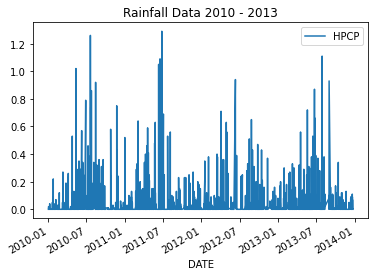

In [60]:
df.plot(kind='line', x='DATE', y='HPCP', title='Rainfall Data 2010 - 2013')

In [61]:
df['HPCP'].mean()

0.03237512742099898

In [62]:
from datetime import datetime
start_date = datetime.fromisoformat('2010-01-01')
end_date = datetime.fromisoformat('2010-12-31')
mask = (df['DATE'] > start_date) & (df['DATE'] <= end_date)
between_2010 = df.loc[mask]
between_2010

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
1725,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 01:00:00,0.0,g,
1726,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 13:00:00,0.0,T,
1727,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 14:00:00,0.0,T,
1728,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 15:00:00,0.0,T,
1729,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01 16:00:00,0.0,T,
...,...,...,...,...,...,...,...,...,...
3086,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-12-30 00:00:00,0.0,T,
3087,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-12-30 01:00:00,0.0,T,
3088,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-12-30 02:00:00,0.0,T,
3089,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-12-30 04:00:00,0.0,T,


In [63]:
between_2010['HPCP'].sum()

38.54

**38.54** in was cross-referenced with [the following website](https://www.currentresults.com/Yearly-Weather/USA/MO/St-Louis/recent-annual-st-louis-temperature-precipitation.php) to be accurate.

According to that website, there was **39.1** inches of rainfall in St. Louis for 2010 according to NOAA.
 
Our dataset was downloaded from NOAA.

## Water Consumption

> Total per capita daily water use at [Dancing Rabbit ecovillage] is a combination of the previous two indicators, public supply
and rainwater catchment. For 2013 and 2014, a total of **20** *estimated* **gallons** (91 litres) **of water was used per
person year, per day**.

— Lockyer, 2017, *Community, commons, and degrowth at Dancing Rabbit
Ecovillage*

In [64]:
# Drop time information from date
df['DATE'] = df['DATE'].map(lambda d: d.date())
df

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
1725,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.0,g,
1726,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.0,T,
1727,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.0,T,
1728,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.0,T,
1729,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37361,2010-01-01,0.0,T,
...,...,...,...,...,...,...,...,...,...
6625,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37360,2013-12-23,0.0,T,
6626,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37360,2013-12-23,0.0,T,
6627,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37360,2013-12-23,0.0,T,
6628,COOP:237455,ST LOUIS LAMBERT INTERNATIONAL AIRPORT MO US,161.8,38.7525,-90.37360,2013-12-23,0.0,T,


In [70]:
# verified and cross-referenced with https://www.weather.gov/lsx/monthTab
by_date = df.groupby('DATE')
by_date.sum()['HPCP']

DATE
2010-01-01    0.03
2010-01-06    0.09
2010-01-07    0.10
2010-01-08    0.00
2010-01-09    0.00
              ... 
2013-12-14    0.44
2013-12-20    0.01
2013-12-21    0.92
2013-12-22    0.10
2013-12-23    0.00
Name: HPCP, Length: 705, dtype: float64

### Roof Size & Rainwater Catchment

> To continue the eco features, we are also doing Rooftop Rainwater Collection, where every inch of water provides 150 gallons of rainwater for a 16'x16' roof. This provides 450 gallons per inch of rainfall over a 675 square foot home model.

From:
https://wiki.opensourceecology.org/wiki/Seed_Eco-Home_Features

> catchment area (ft<sup>2</sup>) * rainfall (ft) * 7.48 gal/ft<sup>3</sup> * runoff coefficient = net runoff (gal)

16 * 16 = 256 ft<sup>2</sup> catchment area

42 in. rainfall per year in St. Louis
https://www.bestplaces.net/climate/city/missouri/st._louis

42in/yr / 12in/ft = 3.5 ft/yr

256 * 3.5 * 7.48

In [66]:
(256 * 3.5 * 7.48) / 365

18.36186301369863

In [74]:
def calculate_runoff(catchment_area: float,
                     rainfall: float,
                     runoff_coefficient: float = 1.0,
                     system: str = 'imperial',
                     unit: str = 'foot') -> float:
    gallons_per_cubic_foot = 7.48
    return (
        catchment_area *
        rainfall *
        gallons_per_cubic_foot *
        runoff_coefficient
    )


def calculate_square_catchment_area(width: float, length: float):
    return width * length

# in feet
roof_width = 16
roof_height = 16

catchment_area = calculate_square_catchment_area(roof_width, roof_height)

annual_rainfall_in_inches = 42
annual_rainfall_in_feet = annual_rainfall_in_inches / 12.0


runoff_coefficient = 0.95
annual_net_runoff_in_gallons = calculate_runoff(catchment_area, annual_rainfall_in_feet, runoff_coefficient)
annual_net_runoff_in_gallons / 365.0

17.4437698630137

In [69]:
calculate_runoff(catchment_area, 0.44 / 12.0, runoff_coefficient)

66.70165333333333